In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imp import reload
import sys
import scipy.special as sp

sys.path.append('../')
import mg_si
from mg_si import plot as mplt
reload(mg_si)
reload(mg_si.planet)
reload(mg_si.core)
reload(mplt)

<module 'mg_si.plot' from '../mg_si/plot.py'>

In [2]:
pl = mg_si.planet.Custom()

In [15]:
# times = np.linspace(0,1000e6*365.25*24*3600,1000)
times = np.linspace(0,4568e6*365.25*24*3600,50000)
T_cmb0 = 6000
T_um0 = 6000-2800.

#T_cmb0 = 5000
#T_um0 = 5000-2800

# T_cmb0 = 5300
# T_um0 = 2700
pl.reactions._set_layer_thickness(900)
x0 = [T_cmb0, T_um0]

## Initial Core State
X_Mg_0 = 1e-5
X_Si_0 = 0.025
X_O_0 = 0.16
Moles_0 = pl.reactions.compute_Moles_0(X_Mg_0, X_Si_0, X_O_0, T_cmb0)

### background mantle state
fraction_MgFe_b = 0.8
X_MgFeO_b = 0.05
X_SiO2_b = 0.01

Mm_b = pl.reactions.mantle.compute_Mm_b(fraction_MgFe_b, X_MgFeO_b, X_SiO2_b)
# Mm_b = Moles_0[4:]

pl.params.reactions.Moles_0 = Moles_0
pl.params.reactions.Mm_b = Mm_b
pl.params.reactions.tau = pl.params.reactions.time_overturn/100
pl.params.reactions.d = 2

x0 = x0+Moles_0

# nu_present = 10**21/pl.params.mantle.rho #[m^2/s]
nu_present = 10**20/pl.params.mantle.rho #[m^2/s]
T_present = 1350 # [K]
nu_old =  nu_present/1e3
T_old = T_um0
A,nu0 = pl.mantle_layer.find_arrenhius_params(nu_present, T_present, nu_old, T_old, set_values=True)


In [16]:
solution = pl.integrate(times, x0)

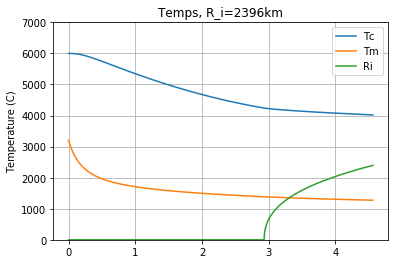

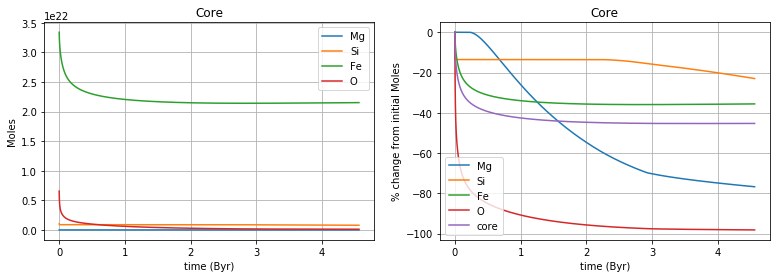

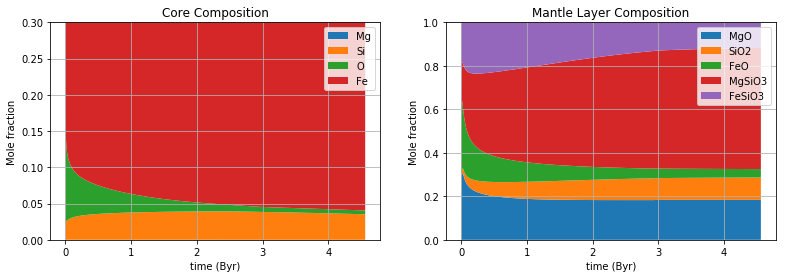

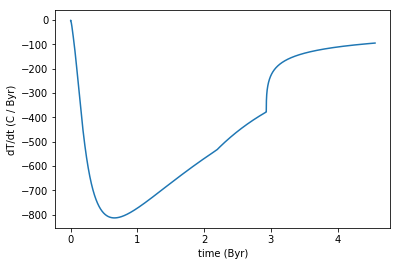

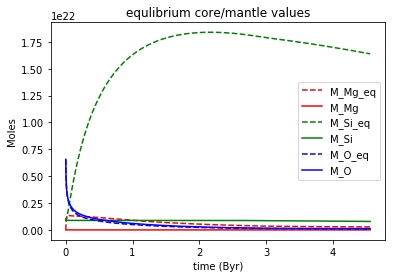

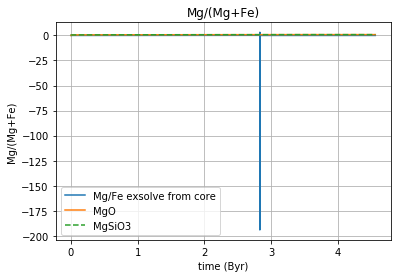

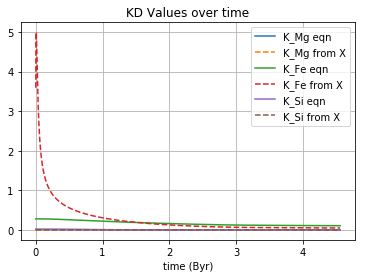

In [17]:
mplt.temperature(pl, times, solution, savename=None)
mplt.coremoles(pl, times, solution, savename=None)
mplt.composition(pl, times, solution, savename=None)
mplt.dTdt(pl, times, solution, savename=None)
mplt.MgSiOequilibrium(pl, times, solution, savename=None)
mplt.MgFefraction(pl, times, solution, savename=None)
mplt.K_vals(pl, times, solution, savename=None)
#plt.close('all')

all_parameters = pl.core_layer.compute_all_parameters(times, solution)
mplt.Q_all(pl, times, all_parameters, savename=None)
mplt.E_all(pl, times, all_parameters, savename=None)

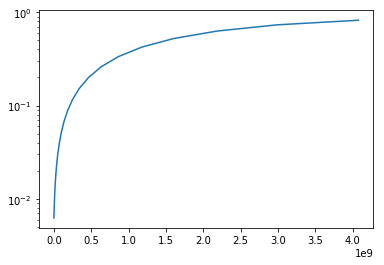

In [6]:
Cyr2s = 365.25*24*3600

time = np.logspace(3,9.61)*Cyr2s
tm = (800e6*Cyr2s - 50e6*Cyr2s) * (1. - np.exp(-0.5*time /( Cyr2s*1e9))) + 50e6*Cyr2s/10.

plt.semilogy(time/Cyr2s,tm/800e6/Cyr2s)